In [ ]:
!python -m nltk.downloader all

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import time
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP_Chatbot_Capstone_Project/data.csv')

In [ ]:
del df['Unnamed: 0'] 
df

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [ ]:
df.describe()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425,425
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,On 02/03/17 during the soil sampling in the re...
freq,6,251,90,241,316,143,403,189,232,3


In [ ]:
for i in range (0, df.shape[1]):
    print("Data type of feature/column ", df.columns[i]," is: ",type(df.iloc[1,i]))

Data type of feature/column  Data  is:  <class 'str'>
Data type of feature/column  Countries  is:  <class 'str'>
Data type of feature/column  Local  is:  <class 'str'>
Data type of feature/column  Industry Sector  is:  <class 'str'>
Data type of feature/column  Accident Level  is:  <class 'str'>
Data type of feature/column  Potential Accident Level  is:  <class 'str'>
Data type of feature/column  Genre  is:  <class 'str'>
Data type of feature/column  Employee or Third Party  is:  <class 'str'>
Data type of feature/column  Critical Risk  is:  <class 'str'>
Data type of feature/column  Description  is:  <class 'str'>


In [ ]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
Description,0,0.0
Critical Risk,0,0.0
Employee or Third Party,0,0.0
Genre,0,0.0
Potential Accident Level,0,0.0
Accident Level,0,0.0
Industry Sector,0,0.0
Local,0,0.0
Countries,0,0.0
Data,0,0.0


In [ ]:
dataframe=df.copy()
y=dataframe['Accident Level'].values
del dataframe['Accident Level']

In [ ]:
categorical_columns=dataframe.columns

# **# Encoding**

> Encoding Dataset for Model Preparation.



In [ ]:
column_names_encoded=list(df.columns)
column_names_encoded.remove('Critical Risk')
column_names_encoded.remove('Description')
column_names_encoded.remove('Data')
column_names_encoded.remove('Accident Level')

In [ ]:
# Performing label encoding of column accident level
import numpy as np
from sklearn.preprocessing import LabelEncoder   
  
def one_hot_encoding_columns(column_name,dataframe):
  accident_level=  dataframe[column_name].to_numpy()
  labelencoder = LabelEncoder()  
  accident_level_encoded = labelencoder.fit_transform(accident_level)
  enc = OneHotEncoder(handle_unknown='ignore')
  X = (np.array(accident_level_encoded).reshape(-1,1))
  drop_enc = enc.fit_transform(X)
  # print(drop_enc.todense())
  dataframe = pd.concat([dataframe,pd.DataFrame(drop_enc.todense(),columns = [column_name+'_'+j for j in labelencoder.inverse_transform(enc.categories_[0])])],axis = 1)
  del dataframe[column_name]
  return dataframe

encoded_dataframe=one_hot_encoding_columns(column_names_encoded[0],df)
for i in range(1,len(column_names_encoded)):
  encoded_dataframe=one_hot_encoding_columns(column_names_encoded[i],encoded_dataframe)

In [ ]:
encoded_dataframe

,Data,Accident Level,Critical Risk,Description,Countries_Country_01,Countries_Country_02,Countries_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Metals,Industry Sector_Mining,Industry Sector_Others,Potential Accident Level_I,Potential Accident Level_II,Potential Accident Level_III,Potential Accident Level_IV,Potential Accident Level_V,Potential Accident Level_VI,Genre_Female,Genre_Male,Employee or Third Party_Employee,Employee or Third Party_Third Party,Employee or Third Party_Third Party (Remote)
0,2016-01-01 00:00:00,I,Pressed,While removing the drill rod of the Jumbo 08 f...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2016-01-02 00:00:00,I,Pressurized Systems,During the activation of a sodium sulphide pum...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2016-01-06 00:00:00,I,Manual Tools,In the sub-station MILPO located at level +170...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2016-01-08 00:00:00,I,Others,Being 9:45 am. approximately in the Nv. 1880 C...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2016-01-10 00:00:00,IV,Others,Approximately at 11:45 a.m. in circumstances t...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,I,Others,"Being approximately 5:00 a.m. approximately, w...",1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
421,2017-07-04 00:00:00,I,Others,The collaborator moved from the infrastructure...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
422,2017-07-05 00:00:00,I,Venomous Animals,During the environmental monitoring activity i...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
423,2017-07-06 00:00:00,I,Cut,The Employee performed the activity of strippi...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
encoded_dataframe.columns

Index(['Data', 'Accident Level', 'Critical Risk', 'Description',
       'Countries_Country_01', 'Countries_Country_02', 'Countries_Country_03',
       'Local_Local_01', 'Local_Local_02', 'Local_Local_03', 'Local_Local_04',
       'Local_Local_05', 'Local_Local_06', 'Local_Local_07', 'Local_Local_08',
       'Local_Local_09', 'Local_Local_10', 'Local_Local_11', 'Local_Local_12',
       'Industry Sector_Metals', 'Industry Sector_Mining',
       'Industry Sector_Others', 'Potential Accident Level_I',
       'Potential Accident Level_II', 'Potential Accident Level_III',
       'Potential Accident Level_IV', 'Potential Accident Level_V',
       'Potential Accident Level_VI', 'Genre_Female', 'Genre_Male',
       'Employee or Third Party_Employee',
       'Employee or Third Party_Third Party',
       'Employee or Third Party_Third Party (Remote)'],
      dtype='object')

In [ ]:
output_column=encoded_dataframe['Accident Level'].values
del encoded_dataframe['Accident Level']

In [ ]:
del encoded_dataframe['Data']

In [ ]:
encoded_dataframe['Merged_Description']= encoded_dataframe['Description']+' '+encoded_dataframe['Critical Risk']

In [ ]:
encoded_dataframe['Merged_Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo. Pressed'

In [ ]:
stop_words = stopwords.words('english')
punctuations = list(string.punctuation)
stop_words += punctuations        

In [ ]:
count_vec=TfidfVectorizer(ngram_range=(1,3),stop_words=stop_words,min_df=0.1,max_df=0.9)
words=[]
for i in range(0,len(encoded_dataframe['Merged_Description'])):
   words.append(" ".join([w for w in word_tokenize(encoded_dataframe['Merged_Description'][i]) if not w in stop_words]))

In [ ]:
words_transformed=count_vec.fit_transform(words)

In [ ]:
count_vec.get_feature_names()

['accident',
 'activity',
 'approximately',
 'area',
 'assistant',
 'causing',
 'causing injury',
 'collaborator',
 'described',
 'employee',
 'equipment',
 'finger',
 'floor',
 'hand',
 'height',
 'injury',
 'left',
 'left hand',
 'level',
 'moment',
 'one',
 'operator',
 'others',
 'right',
 'right hand',
 'rock',
 'safety',
 'support',
 'time',
 'time accident',
 'work',
 'worker']

In [ ]:
result = pd.concat([encoded_dataframe,pd.DataFrame(words_transformed.todense(),columns=['word_'+str(i)+'_'+count_vec.get_feature_names()[i] for i in range(0,words_transformed.todense().shape[1])])],axis=1)

In [ ]:
del result['Critical Risk']
del result['Description']
del result['Merged_Description']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(result)
k = 0
total = 0
while total <.99:
    total = total + pca.explained_variance_ratio_[k]  #adding variance ratio 
    k = k + 1
k

43

In [ ]:
pca = PCA(n_components=k)
pca.fit(result)
skl_transformed = pca.fit_transform(result) 
# pca.components_,pca.explained_variance_ratio_ #explained variance ratios wrt each component 

In [ ]:
labelencoder_y = LabelEncoder()  
accident_level_encoded = labelencoder_y.fit_transform(output_column)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(result,accident_level_encoded,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((318, 61), (107, 61), (318,), (107,))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Feature Countries_Country_01: 4.261640
Feature Countries_Country_02: 3.119812
Feature Countries_Country_03: 0.466216
Feature Local_Local_01: 0.001221
Feature Local_Local_02: 0.356880
Feature Local_Local_03: 0.232670
Feature Local_Local_04: 4.520625
Feature Local_Local_05: 3.827133
Feature Local_Local_06: 0.002189
Feature Local_Local_07: 0.388528
Feature Local_Local_08: 2.219815
Feature Local_Local_09: 0.492148
Feature Local_Local_10: 0.466216
Feature Local_Local_11: 0.492148
Feature Local_Local_12: 1.043498
Feature Industry Sector_Metals: 3.944641
Feature Industry Sector_Mining: 5.713504
Feature Industry Sector_Others: 0.660533
Feature Potential Accident Level_I: 11.129024
Feature Potential Accident Level_II: 17.533325
Feature Potential Accident Level_III: 9.863037
Feature Potential Accident Level_IV: 23.600861
Feature Potential Accident Level_V: 70.672977
Feature Potential Accident Level_VI: nan
Feature Genre_Female: 1.112326
Feature Genre_Male: 1.112326
Feature Employee or Third Part

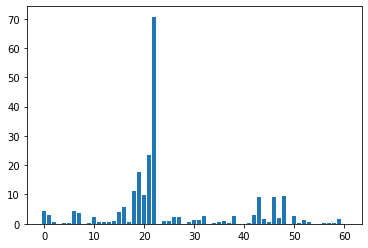

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


def select_features_correlation(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features_correlation(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature '+list(result.columns)[i]+': %f' % (fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(skl_transformed,accident_level_encoded)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression


# def select_features_correlation(X_train, y_train, X_test):
# 	# configure to select all features
# 	fs = SelectKBest(score_func=f_regression, k='all')
# 	# learn relationship from training data
# 	fs.fit(X_train, y_train)
# 	# transform train input data
# 	X_train_fs = fs.transform(X_train)
# 	# transform test input data
# 	X_test_fs = fs.transform(X_test)
# 	return X_train_fs, X_test_fs, fs

# X_train_fs, X_test_fs, fs = select_features_correlation(x_train, y_train, x_test)
# # what are scores for the features
# for i in range(len(fs.scores_)):
# 	print('Feature '+list([str(i) for i in pd.DataFrame(skl_transformed).columns])[i]+': %f' % (fs.scores_[i]))
# # plot the scores
# plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.show()

In [ ]:
! pip install imbalanced-learn

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((318, 61), (107, 61), (318,), (107,))

In [ ]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=0)
# X_res, y_res = sm.fit_sample(x_train, y_train)
# X_res.shape,y_res.shape,x_test.shape,y_test.shape

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold  # Used to create a KFold object
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [ ]:
from sklearn.ensemble import RandomForestClassifier

def Random_Forest_Classifier(x_train,x_test,y_train,y_test):
  grid = GridSearchCV(clf, grid)
  abc.fit(x_train, y_train)
  rfcl = RandomForestClassifier(n_estimators = 6)
  rfcl = rfcl.fit(x_train, y_train)
  y_pred=rfcl.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
  return f1_score(y_train, rfcl.predict(x_train), average='weighted'),accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')

def SVM_classifier(x_train,x_test,y_train,y_test):
  model=svm.SVC()
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test, y_pred))
  print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
  return f1_score(y_train, model.predict(x_train), average='weighted'),accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')


def KNN_classifier(x_train,x_test,y_train,y_test):
  model= KNeighborsClassifier(n_neighbors=5)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test, model.predict(x_test)))
  print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
  return f1_score(y_train, model.predict(x_train), average='weighted'),accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')



def NB_classifier(x_train,x_test,y_train,y_test):
  # Using the Gaussian Kernel for Naive Bayes.................
  model = GaussianNB()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
  return f1_score(y_train, model.predict(x_train), average='weighted'),accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')



def LR_classifier(x_train,x_test,y_train,y_test):
  model= LogisticRegression() 
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
  return f1_score(y_train, model.predict(x_train), average='weighted'),accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')



from sklearn import tree
def DTree_classifier(x_train,x_test,y_train,y_test):
  dTree = tree.DecisionTreeClassifier(criterion = 'gini', random_state=0)
  dTree.fit(x_train, y_train)
  y_pred = dTree.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
  return f1_score(y_train, dTree.predict(x_train), average='weighted'),accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')



# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
def Bagging_Classifer(x_train,x_test,y_train,y_test):
  bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True)
  bgcl = bgcl.fit(x_train, y_train)
  y_pred = bgcl.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
  return f1_score(y_train, bgcl.predict(x_train), average='weighted'),accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')



 # Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
def Gradient_Boosting_Classifier(x_train,x_test,y_train,y_test):
  gb = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
  gb.fit(x_train, y_train)
  y_pred=gb.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
  return f1_score(y_train, gb.predict(x_train), average='weighted'),accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')



# Ada Boosting
from sklearn.ensemble import AdaBoostClassifier
def AdaBoost_Classifier(x_train,x_test,y_train,y_test):
  dt_model = tree.DecisionTreeClassifier(criterion = 'entropy' )  
  abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
  abcl = abcl.fit(x_train, y_train)
  y_pred=abcl.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
  return f1_score(y_train, abcl.predict(x_train), average='weighted'),accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')



In [ ]:
test_score=[]

In [ ]:
test_score.append(Random_Forest_Classifier(x_train,x_test,y_train,y_test))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86        77
           1       0.33      0.09      0.14        11
           2       0.50      0.11      0.18         9
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         4

    accuracy                           0.74       107
   macro avg       0.42      0.27      0.29       107
weighted avg       0.66      0.74      0.67       107

[[76  0  1  0  0]
 [ 9  1  0  1  0]
 [ 6  2  1  0  0]
 [ 4  0  0  1  1]
 [ 4  0  0  0  0]]
F1-Score: 0.6654933851195532


In [ ]:
test_score.append(SVM_classifier(x_train,x_test,y_train,y_test))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        77
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4

    accuracy                           0.72       107
   macro avg       0.14      0.20      0.17       107
weighted avg       0.52      0.72      0.60       107

[[77  0  0  0  0]
 [11  0  0  0  0]
 [ 9  0  0  0  0]
 [ 6  0  0  0  0]
 [ 4  0  0  0  0]]
F1-Score: 0.6022958147094676


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_score.append(NB_classifier(x_train,x_test,y_train,y_test))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        77
           1       0.05      0.18      0.07        11
           2       0.00      0.00      0.00         9
           3       0.11      0.67      0.20         6
           4       0.00      0.00      0.00         4

    accuracy                           0.18       107
   macro avg       0.23      0.20      0.11       107
weighted avg       0.73      0.18      0.23       107

[[13 41  9 14  0]
 [ 0  2  4  5  0]
 [ 0  1  0  8  0]
 [ 0  0  2  4  0]
 [ 0  0  0  4  0]]
F1-Score: 0.22631005749309835


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_score.append(KNN_classifier(x_train,x_test,y_train,y_test))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        77
           1       0.11      0.09      0.10        11
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         6
           4       1.00      0.25      0.40         4

    accuracy                           0.69       107
   macro avg       0.37      0.26      0.27       107
weighted avg       0.59      0.69      0.63       107

[[72  4  0  1  0]
 [10  1  0  0  0]
 [ 7  2  0  0  0]
 [ 3  2  1  0  0]
 [ 3  0  0  0  1]]
F1-Score: 0.6277113670941099


In [ ]:
test_score.append(LR_classifier(x_train,x_test,y_train,y_test))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        77
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         6
           4       1.00      0.25      0.40         4

    accuracy                           0.68       107
   macro avg       0.36      0.24      0.25       107
weighted avg       0.60      0.68      0.63       107

[[72  4  1  0  0]
 [10  0  0  1  0]
 [ 5  3  0  1  0]
 [ 4  2  0  0  0]
 [ 1  0  0  2  1]]
F1-Score: 0.6281258640712271


In [ ]:
test_score.append(DTree_classifier(x_train,x_test,y_train,y_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.12      0.09      0.11        11
           2       0.25      0.11      0.15         9
           3       0.17      0.33      0.22         6
           4       0.00      0.00      0.00         4

    accuracy                           0.68       107
   macro avg       0.28      0.29      0.27       107
weighted avg       0.65      0.68      0.66       107

[[69  4  3  1  0]
 [ 7  1  0  3  0]
 [ 2  2  1  3  1]
 [ 3  1  0  2  0]
 [ 1  0  0  3  0]]
F1-Score: 0.6608040386358515


In [ ]:
test_score.append(Bagging_Classifer(x_train,x_test,y_train,y_test))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87        77
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         9
           3       0.14      0.17      0.15         6
           4       0.00      0.00      0.00         4

    accuracy                           0.72       107
   macro avg       0.18      0.23      0.20       107
weighted avg       0.57      0.72      0.63       107

[[76  0  1  0  0]
 [ 9  0  0  2  0]
 [ 7  1  0  1  0]
 [ 5  0  0  1  0]
 [ 1  0  0  3  0]]
F1-Score: 0.6336736161035226


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_score.append(AdaBoost_Classifier(x_train,x_test,y_train,y_test))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84        77
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4

    accuracy                           0.69       107
   macro avg       0.15      0.19      0.17       107
weighted avg       0.53      0.69      0.60       107

[[74  2  1  0  0]
 [10  0  0  1  0]
 [ 6  1  0  1  1]
 [ 6  0  0  0  0]
 [ 4  0  0  0  0]]
F1-Score: 0.6017213158033686


In [ ]:
test_score.append(Gradient_Boosting_Classifier(x_train,x_test,y_train,y_test))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        77
           1       0.20      0.09      0.13        11
           2       0.67      0.22      0.33         9
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4

    accuracy                           0.71       107
   macro avg       0.33      0.25      0.26       107
weighted avg       0.62      0.71      0.65       107

[[73  3  1  0  0]
 [ 9  1  0  1  0]
 [ 6  0  2  0  1]
 [ 5  1  0  0  0]
 [ 3  0  0  1  0]]
F1-Score: 0.6482024201825941


In [ ]:
names=np.array(['Random Forest','SVM','Naive Bayes','KNN','Logistic Regression','Decision Tree','Bagging','Gradient Boosting','AdaBoost'])
test_score=np.array(test_score)

In [ ]:
test_score=pd.DataFrame(test_score,columns=['Train Score','Test Accuracy Score','Test Weighted Precison Score','Test Weighted Recall Score','Test Weighted F-1 Score'])
test_score['Name of Algorithm']=names
test_score

,Train Score,Test Accuracy Score,Test Weighted Precison Score,Test Weighted Recall Score,Test Weighted F-1 Score,Name of Algorithm
0,0.947788,0.738318,0.656802,0.738318,0.665493,Random Forest
1,0.644976,0.719626,0.517862,0.719626,0.602296,SVM
2,0.316556,0.177570,0.730708,0.177570,0.226310,Naive Bayes
3,0.717701,0.691589,0.594207,0.691589,0.627711,KNN
4,0.772040,0.682243,0.600569,0.682243,0.628126,Logistic Regression
5,0.993660,0.682243,0.648763,0.682243,0.660804,Decision Tree
6,0.912973,0.719626,0.566088,0.719626,0.633674,Bagging
7,0.993660,0.691589,0.532523,0.691589,0.601721,Gradient Boosting
8,0.993660,0.710280,0.623851,0.710280,0.648202,AdaBoost


In [ ]:
# test_f1_score_pd=pd.DataFrame((np.vstack(([float(i) for i in test_score], names)).T),columns=['Train Score','Test Accuracy Score','Test Weighted Precison Score','Test Weighted Recall Score','Test Weighted F-1 Score','Name of Algorithm'])

<Figure size 7200x1440 with 0 Axes>

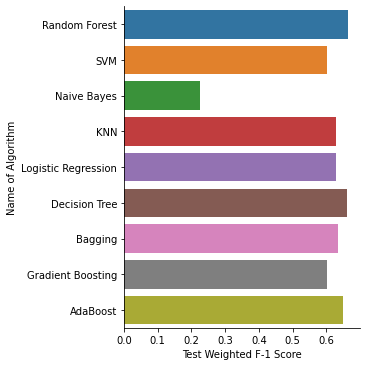

In [ ]:
plt.figure(figsize=(100,20))
sns.catplot(x='Test Weighted F-1 Score', y='Name of Algorithm',data=test_score,kind='bar');

<Figure size 7200x1440 with 0 Axes>

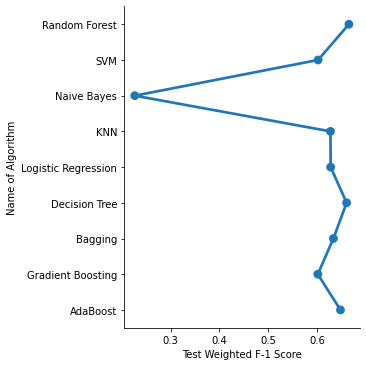

In [ ]:
plt.figure(figsize=(100,20))
sns.catplot(x='Test Weighted F-1 Score', y='Name of Algorithm',data=test_score,kind='point');

In [ ]:
# SVM_classifier(X_res,x_test,y_res,y_test)

In [ ]:
# KNN_classifier(X_res,x_test,y_res,y_test)

In [ ]:
# NB_classifier(X_res,x_test,y_res,y_test)

In [ ]:
# Random_Forest_Classifier(X_res,x_test,y_res,y_test)